In [1]:
import sys, os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_image(im) :

    # Opening image as greyscale
    img = Image.open(im).convert('L')
    img.load()

    # Converting image into a numpy array
    data = np.asarray(img, dtype="int32")

    return data

In [3]:
def PCA_decompose(images, num_comp):

    # Find mean of the images
    mean = np.mean(images.T, axis=1)
    
    # Center the matrix by subtracting the mean
    centered = images - mean
    
    # Find covariance matrix
    cov = np.matmul(centered, centered.T)

    # Retrieving the eigenvalues and eigenvectors
    values, vectors = np.linalg.eig(cov)
    
    # Reducing number of vectors based on num_comp
    vectors = vectors[:,range(num_comp)]
    
    # Finding projection matrix
    projection = np.dot(vectors.T, centered)

    return values, vectors, projection


In [4]:
# def find_MSE():

# Specifying directory where files are stored
train_dir = os.listdir('./dataset')

# Sorting files in lexicographic order
train_dir.sort()

# Getting all images and then adding them to one single numpy array
images = None
MSE = np.zeros(60)
for x in train_dir:
    img = read_image('./dataset/' + x)
    img = img.flatten()
    if images is None:
        images = img
    else:
        images = np.vstack([images, img])
    
#     return MSE

In [5]:
# Initializing array of MSE to 0
MSE = []
for i in range(10):
#     print(i)
    val, vec, pro = PCA_decompose(images, i) 
    Ar = np.dot(vec,pro) + np.mean(images,axis=0)
    MSE.append(np.mean(np.square(images - Ar)))

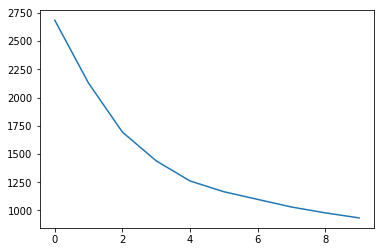

In [6]:
plt.plot(MSE)

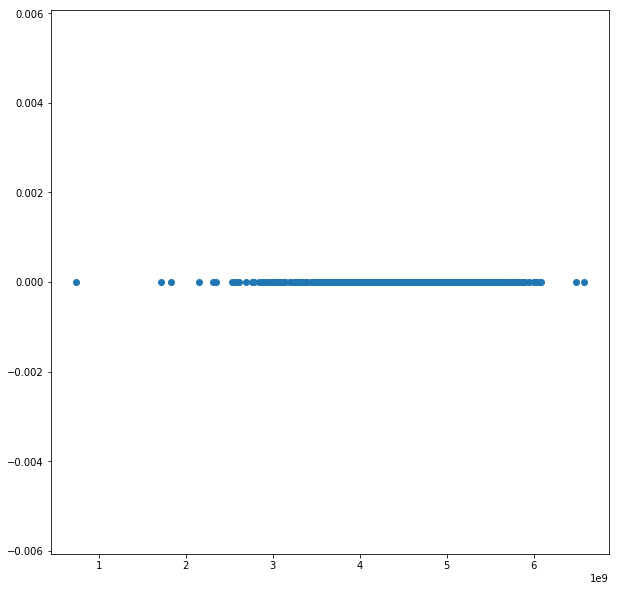

In [16]:
fig = plt.figure(figsize=(10,10))
coEff = np.matmul(pro, images.T)
plt.scatter(coEff[0], np.zeros((1, len(coEff[0]))))
plt.show()

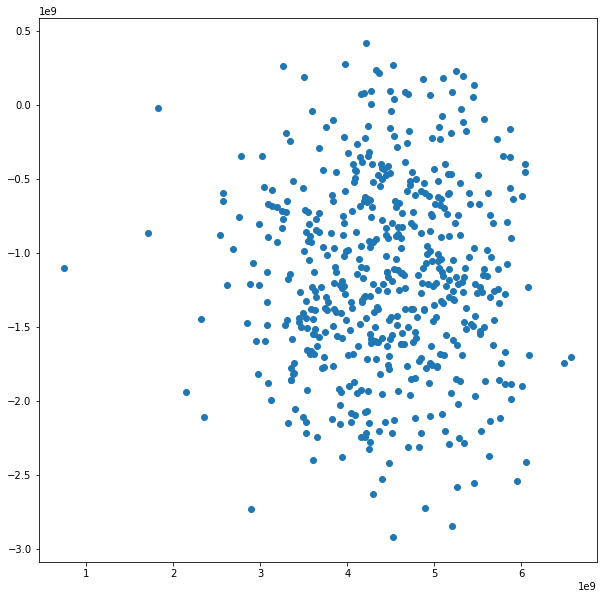

In [15]:
fig = plt.figure(figsize=(10,10))
coEff = np.matmul(pro, images.T)
a = coEff.T
x = [i[0] for i in a]
y = [i[1] for i in a]
plt.scatter(x, y)
plt.show()

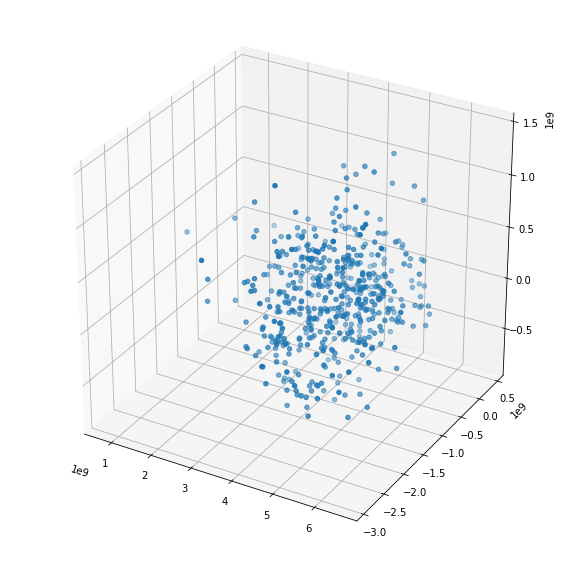

In [13]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
coEff = np.matmul(pro, images.T)
a = coEff.T
x = [i[0] for i in a]
y = [i[1] for i in a]
z = [i[2] for i in a]


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3D')
ax.scatter(x, y, z)
plt.show()